In [18]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [19]:
train = pd.read_csv('./train.csv')
train.head()   #顯示前5筆資料

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000


## 取出連續型特徵 (方便降維)

In [23]:
continual = train.columns[(train.dtypes!='object')]
df = train[continual]
df = df.drop(columns=['Id'])   #Id不重要
print(f'continual: {len(df.columns)}')
print(df)


continual: 37
      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         60.0    21930            5            5       2005   
1             60         68.0    10769            8            5       2007   
2            120         34.0     4590            8            5       2006   
3             50         60.0     9600            5            8       1925   
4             80         94.0     7819            6            5       1976   
...          ...          ...      ...          ...          ...        ...   
1090          70         51.0     9842            5            6       1921   
1091          50         51.0     6120            7            5       1931   
1092          20         60.0     7200            7            5       2006   
1093          20         88.0    10994            8            5       2005   
1094          20         60.0     7200            5            8       1950   

      YearRemodAdd  MasVnrArea  BsmtF

## 分析缺失值

MasVnrArea       7
GarageYrBlt     67
LotFrontage    191
dtype: int64


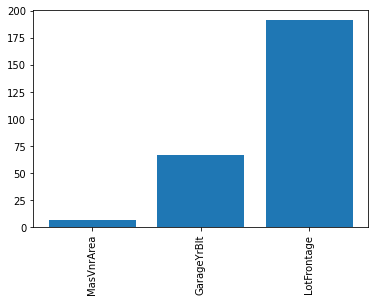

In [24]:
missing = df.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
print(missing)     

plt.figure(figsize = (6, 4))
plt.bar(list(missing.index), np.array(missing))    #也可寫成plt.bar(list(missing.index), missing)
plt.xticks(rotation='vertical')    #將項目以直式顯示
plt.show()


## 去除缺失值

In [25]:
df = df.dropna()
df.isnull().sum(axis=0)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [33]:
target = 'SalePrice'
X = np.asarray(df.drop(columns = [target]))
Y = np.asarray(df[target])

# 將 Y 依照四分位距分成四類
Y = pd.qcut(Y, 4, labels = False)

# 將 X 標準化
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

print(X)
print(Y)
print(X.shape, Y.shape)



[[ 0.07541463 -0.43058063  2.20217299 ... -0.1390489   0.26292369
  -1.35974501]
 [ 0.07541463 -0.11020188  0.16531533 ... -0.1390489  -0.85361374
   0.8847717 ]
 [ 1.49292769 -1.47181158 -0.96233843 ... -0.1390489   0.63510283
  -0.61157277]
 ...
 [-0.86959408 -0.43058063 -0.48601923 ... -0.1390489   0.63510283
  -1.35974501]
 [-0.86959408  0.690745    0.20637733 ... -0.1390489   1.00728198
   0.8847717 ]
 [-0.86959408 -0.43058063 -0.48601923 ... -0.1390489   0.26292369
  -0.61157277]]
[2 2 2 0 0 1 1 3 3 2 0 0 1 1 0 3 1 3 0 3 3 2 3 3 1 3 0 2 1 1 2 2 3 0 2 2 0
 3 0 1 0 3 2 3 0 0 2 3 2 1 3 1 0 2 2 0 2 0 0 0 1 1 1 2 1 1 2 3 1 1 1 2 1 0
 3 3 0 0 1 2 3 3 0 3 2 0 1 0 3 2 3 2 2 0 0 2 3 3 2 3 0 1 1 1 1 1 3 3 0 2 0
 3 0 3 2 2 1 1 0 2 2 1 3 0 0 1 1 1 3 0 2 1 1 2 3 1 2 0 0 2 3 3 1 0 2 3 2 1
 3 0 0 2 2 1 2 0 2 2 3 0 3 1 1 0 3 3 1 0 0 2 2 3 0 1 3 0 3 3 0 3 2 0 1 1 0
 3 0 2 2 2 1 2 0 2 3 1 0 0 2 2 0 2 2 1 0 2 3 2 1 0 3 3 1 0 0 3 0 3 1 1 2 1
 1 3 3 3 0 3 3 2 2 1 1 1 3 1 0 0 3 3 3 0 1 2 3 0 2 2 1 0 3

## 利用 TSNE 降維

In [34]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)



## 做圖

In [45]:
X_tsne = pd.DataFrame(X_tsne)
X_tsne.columns = ['X_tsne1','X_tsne2']
X_tsne['label'] = Y
X_tsne.head()

,X_tsne1,X_tsne2,label
0,8.627926,-9.575711,2
1,14.137448,-9.174552,2
2,17.714039,19.355156,2
3,-19.806133,4.878878,0
4,-16.942608,-18.737211,0


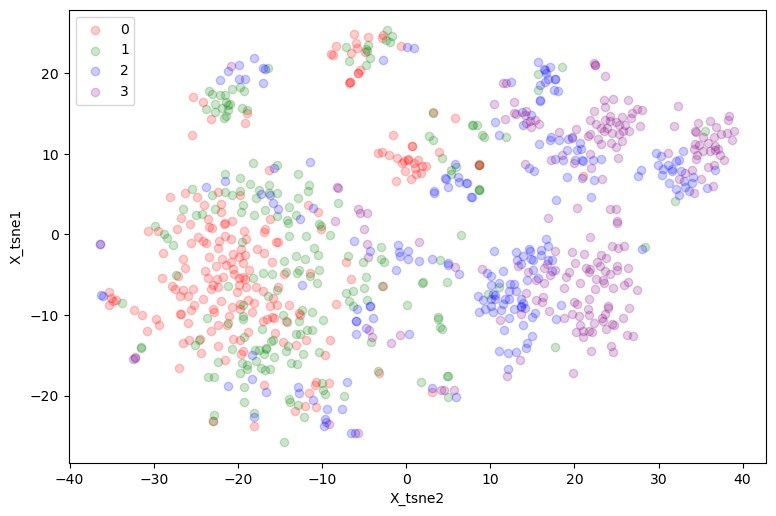

In [47]:
X_tsne_0 = X_tsne[X_tsne['label']==0]
X_tsne_1 = X_tsne[X_tsne['label']==1]
X_tsne_2 = X_tsne[X_tsne['label']==2]
X_tsne_3 = X_tsne[X_tsne['label']==3]



plt.figure(figsize = (9, 6), dpi = 100)
plt.scatter(X_tsne_0['X_tsne1'], X_tsne_0['X_tsne2'],c='red',label=X_tsne['label'],alpha = 0.2)
plt.scatter(X_tsne_1['X_tsne1'], X_tsne_1['X_tsne2'],c='green',label=X_tsne['label'],alpha = 0.2)
plt.scatter(X_tsne_2['X_tsne1'], X_tsne_2['X_tsne2'],c='blue',label=X_tsne['label'],alpha = 0.2)
plt.scatter(X_tsne_3['X_tsne1'], X_tsne_3['X_tsne2'],c='purple',label=X_tsne['label'],alpha = 0.2)
plt.ylabel('X_tsne1', fontsize = 10)
plt.xlabel('X_tsne2', fontsize = 10)
plt.legend(np.unique(X_tsne['label']),loc='upper left')
plt.show()
    
    


#plt.figure(figsize = (8, 5), dpi = 100)
#sns.scatterplot(
#    x = 'X_tsne1', y = 'X_tsne2',
#    hue = 'label', palette = sns.color_palette('hls', 4),
#    data = df_tsne, legend = 'full',
#    alpha = 0.3
#)
#plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？